In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


first test 

using normal model ( Random Forest )
and checking the feature extracted accuracy 



In [28]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from pyAudioAnalysis import audioBasicIO, ShortTermFeatures
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from torch.utils.data import DataLoader, TensorDataset


In [29]:
trainData = pd.read_excel(r"C:\Users\ashut\Documents\GitHub\edm-subgenre-classification\TRAIN.xlsx")
testData = pd.read_excel(r"C:\Users\ashut\Documents\GitHub\edm-subgenre-classification\TEST.xlsx")



xtrain = trainData.select_dtypes(include=[float, int]).drop('Genre', axis=1, errors='ignore')
ytrain = trainData['Genre']
xtest = testData.select_dtypes(include=[float, int]).drop('Genre', axis=1, errors='ignore')
ytest = testData['Genre']




label_encoder = LabelEncoder()
ytrain = label_encoder.fit_transform(ytrain)
ytest = label_encoder.transform(ytest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, ytrain)




ypredict = model.predict(X_test_scaled)


accuracy = accuracy_score(ytest, ypredict)
print(f"Accuracy on test set: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(ytest, ypredict, target_names=label_encoder.classes_))


Accuracy on test set: 0.4963

Classification Report:
                  precision    recall  f1-score   support

       AFROHOUSE       0.61      0.70      0.65        40
         AMBIENT       0.69      0.93      0.79        40
       BASSHOUSE       0.37      0.38      0.37        40
         BIGROOM       0.51      0.62      0.56        40
       BREAKBEAT       0.81      0.95      0.87        40
     DRUMANDBASS       0.42      0.20      0.27        40
         DUBSTEP       0.76      0.80      0.78        40
      ELECTROPOP       0.33      0.25      0.29        40
      FUTUREBASS       0.28      0.35      0.31        40
     FUTUREHOUSE       0.37      0.17      0.24        40
       HARDSTYLE       0.58      0.35      0.44        40
     JACKINHOUSE       0.54      0.53      0.53        40
  MELODICDUBSTEP       0.13      0.15      0.14        40
           PHONK       0.48      0.35      0.41        40
PROGRESSIVEHOUSE       0.65      0.80      0.72        40
      PSY-TRANCE  

MODULES

In [21]:
# import numpy as np
# import torch
# import torch.nn as nn

# class Conv_1d(nn.Module):
#     def __init__(self, input_channels, output_channels, shape=3, stride=1, pooling=2):
#         super(Conv_1d, self).__init__()
#         self.conv = nn.Conv1d(input_channels, output_channels, shape, stride=stride, padding=shape//2)
#         self.bn = nn.BatchNorm1d(output_channels)
#         self.relu = nn.ReLU()
#         self.mp = nn.MaxPool1d(pooling)
#     def forward(self, x):
#         out = self.mp(self.relu(self.bn(self.conv(x))))
#         return out


# class Conv_2d(nn.Module):
#     def __init__(self, input_channels, output_channels, shape=3, stride=1, pooling=2):
#         super(Conv_2d, self).__init__()
#         self.conv = nn.Conv2d(input_channels, output_channels, shape, stride=stride, padding=shape//2)
#         self.bn = nn.BatchNorm2d(output_channels)
#         self.relu = nn.ReLU()
#         self.mp = nn.MaxPool2d(pooling)
#     def forward(self, x):
#         out = self.mp(self.relu(self.bn(self.conv(x))))
#         return out


# class Res_2d(nn.Module):
#     def __init__(self, input_channels, output_channels, shape=3, stride=2):
#         super(Res_2d, self).__init__()
#         # convolution
#         self.conv_1 = nn.Conv2d(input_channels, output_channels, shape, stride=stride, padding=shape//2)
#         self.bn_1 = nn.BatchNorm2d(output_channels)
#         self.conv_2 = nn.Conv2d(output_channels, output_channels, shape, padding=shape//2)
#         self.bn_2 = nn.BatchNorm2d(output_channels)

#         # residual
#         self.diff = False
#         if (stride != 1) or (input_channels != output_channels):
#             self.conv_3 = nn.Conv2d(input_channels, output_channels, shape, stride=stride, padding=shape//2)
#             self.bn_3 = nn.BatchNorm2d(output_channels)
#             self.diff = True
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         # convolution
#         out = self.bn_2(self.conv_2(self.relu(self.bn_1(self.conv_1(x)))))

#         # residual
#         if self.diff:
#             x = self.bn_3(self.conv_3(x))
#         out = x + out
#         out = self.relu(out)
#         return out


# class Res_2d_mp(nn.Module):
#     def __init__(self, input_channels, output_channels, pooling=2):
#         super(Res_2d_mp, self).__init__()
#         self.conv_1 = nn.Conv2d(input_channels, output_channels, 3, padding=1)
#         self.bn_1 = nn.BatchNorm2d(output_channels)
#         self.conv_2 = nn.Conv2d(output_channels, output_channels, 3, padding=1)
#         self.bn_2 = nn.BatchNorm2d(output_channels)
#         self.relu = nn.ReLU()
#         self.mp = nn.MaxPool2d(pooling)
#     def forward(self, x):
#         out = self.bn_2(self.conv_2(self.relu(self.bn_1(self.conv_1(x)))))
#         out = x + out
#         out = self.mp(self.relu(out))
#         return out


# class ResSE_1d(nn.Module):
#     def __init__(self, input_channels, output_channels, shape=3, stride=1, pooling=3):
#         super(ResSE_1d, self).__init__()
#         # convolution
#         self.conv_1 = nn.Conv1d(input_channels, output_channels, shape, stride=stride, padding=shape//2)
#         self.bn_1 = nn.BatchNorm1d(output_channels)
#         self.conv_2 = nn.Conv1d(output_channels, output_channels, shape, padding=shape//2)
#         self.bn_2 = nn.BatchNorm1d(output_channels)

#         # squeeze & excitation
#         self.dense1 = nn.Linear(output_channels, output_channels)
#         self.dense2 = nn.Linear(output_channels, output_channels)

#         # residual
#         self.diff = False
#         if (stride != 1) or (input_channels != output_channels):
#             self.conv_3 = nn.Conv1d(input_channels, output_channels, shape, stride=stride, padding=shape//2)
#             self.bn_3 = nn.BatchNorm1d(output_channels)
#             self.diff = True
#         self.relu = nn.ReLU()
#         self.sigmoid = nn.Sigmoid()
#         self.mp = nn.MaxPool1d(pooling)

#     def forward(self, x):
#         # convolution
#         out = self.bn_2(self.conv_2(self.relu(self.bn_1(self.conv_1(x)))))

#         # squeeze & excitation
#         se_out = nn.AvgPool1d(out.size(-1))(out)
#         se_out = se_out.squeeze(-1)
#         se_out = self.relu(self.dense1(se_out))
#         se_out = self.sigmoid(self.dense2(se_out))
#         se_out = se_out.unsqueeze(-1)
#         out = torch.mul(out, se_out)

#         # residual
#         if self.diff:
#             x = self.bn_3(self.conv_3(x))
#         out = x + out
#         out = self.mp(self.relu(out))
#         return out


# class Conv_V(nn.Module):
#     # vertical convolution
#     def __init__(self, input_channels, output_channels, filter_shape):
#         super(Conv_V, self).__init__()
#         self.conv = nn.Conv2d(input_channels, output_channels, filter_shape,
#                               padding=(0, filter_shape[1]//2))
#         self.bn = nn.BatchNorm2d(output_channels)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = self.relu(self.bn(self.conv(x)))
#         freq = x.size(2)
#         out = nn.MaxPool2d((freq, 1), stride=(freq, 1))(x)
#         out = out.squeeze(2)
#         return out


# class Conv_H(nn.Module):
#     # horizontal convolution
#     def __init__(self, input_channels, output_channels, filter_length):
#         super(Conv_H, self).__init__()
#         self.conv = nn.Conv1d(input_channels, output_channels, filter_length,
#                               padding=filter_length//2)
#         self.bn = nn.BatchNorm1d(output_channels)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         freq = x.size(2)
#         out = nn.AvgPool2d((freq, 1), stride=(freq, 1))(x)
#         out = out.squeeze(2)
#         out = self.relu(self.bn(self.conv(out)))
#         return out

# class Joint_ShortChunkCNN_Res_early(nn.Module):
#     def __init__(self, n_channels, n_class, n_frame):
#         super(Joint_ShortChunkCNN_Res_early, self).__init__()

#         self.name = "early"
#         # CNN layers
#         self.layer1 = Res_2d(1, n_channels, stride=2)
#         self.layer2 = Res_2d(n_channels, n_channels, stride=2)
#         self.layer3 = Res_2d(n_channels, n_channels * 2, stride=2)
#         self.layer4 = Res_2d(n_channels * 2, n_channels * 2, stride=2)
#         self.layer5 = Res_2d(n_channels * 2, n_channels * 2, stride=2)
#         self.layer6 = Res_2d(n_channels * 2, n_channels * 2, stride=2)
#         self.layer7 = Res_2d(n_channels * 2, n_channels * 4, stride=2)

#         # Dense layers
#         self.dense1 = nn.Linear(n_channels * 4 + 384, n_channels * 4)
#         self.bn = nn.BatchNorm1d(n_channels * 4)
#         self.dense2 = nn.Linear(n_channels * 4, n_class)
#         self.dropout = nn.Dropout(0.5)
#         self.relu = nn.ReLU()

#         # Late-fusion CNN
#         self.conv1d_1 = nn.Conv1d(n_frame, n_frame, kernel_size=3, stride=2)
#         self.conv1d_2 = nn.Conv1d(n_frame, n_frame, kernel_size=3, stride=3)
#         self.conv1d_3 = nn.Conv1d(n_frame, n_frame, kernel_size=5, stride=3)
#         self.conv1d_4 = nn.Conv1d(n_frame, n_frame, kernel_size=5, stride=5)
#         self.conv1d_w = nn.Conv1d(1, 1, kernel_size=3, stride=2)
#         self.bn_1 = nn.BatchNorm1d(n_frame)
#         self.avgpool = nn.AvgPool1d(n_frame)
#         self.maxpool = nn.MaxPool1d(3, stride=3)
#         self.bn_w = nn.BatchNorm1d(1)

#     def forward(self, x, y, z):
#         # Late-fusion CNN
#         x = torch.reshape(x, (x.shape[0], x.shape[2], x.shape[1]))
#         y = torch.reshape(y, (y.shape[0], y.shape[2], y.shape[1]))
#         x1 = self.conv1d_1(x)
#         x1 = self.bn_1(x1)
#         x1 = self.relu(x1)
#         x2 = self.conv1d_2(x)
#         x2 = self.bn_1(x2)
#         x2 = self.relu(x2)
#         x3 = self.conv1d_3(x)
#         x3 = self.bn_1(x3)
#         x3 = self.relu(x3)
#         x4 = self.conv1d_4(x)
#         x4 = self.bn_1(x4)
#         x4 = self.relu(x4)
#         w = torch.cat((x1, x2, x3, x4), dim=2)

#         y1 = self.conv1d_1(y)
#         y1 = self.bn_1(y1)
#         y1 = self.relu(y1)
#         y2 = self.conv1d_2(y)
#         y2 = self.bn_1(y2)
#         y2 = self.relu(y2)
#         y3 = self.conv1d_3(y)
#         y3 = self.bn_1(y3)
#         y3 = self.relu(y3)
#         y4 = self.conv1d_4(y)
#         y4 = self.bn_1(y4)
#         y4 = self.relu(y4)
#         y = torch.cat((y1, y2, y3, y4), dim=2)
#         w = torch.cat((w, y), dim=2)
#         w = torch.reshape(w, (w.shape[0], w.shape[2], w.shape[1]))
#         w = self.avgpool(w)
#         w = self.conv1d_w(w)
#         w = self.bn_w(w)
#         w = self.relu(w)
#         w = self.maxpool(w)
#         w = torch.flatten(w, 1)

#         # CNN layers
#         z = self.layer1(z)
#         z = self.layer2(z)
#         z = self.layer3(z)
#         z = self.layer4(z)
#         z = self.layer5(z)
#         z = self.layer6(z)
#         z = self.layer7(z)
#         z = z.squeeze(2)

#         # Global Max Pooling
#         if z.size(-1) != 1:
#             z = nn.MaxPool1d(z.size(-1))(z)
#         z = z.squeeze(2)

#         # Dense layers
#         z = torch.cat((z, w), dim=1)
#         z = self.dense1(z)
#         z = self.bn(z)
#         z = self.relu(z)
#         z = self.dropout(z)
#         z = self.dense2(z)
#         z = nn.Softmax()(z)

#         return z


# # Modules for harmonic filters
# def hz_to_midi(hz):
#     return 12 * (torch.log2(hz) - np.log2(440.0)) + 69

# def midi_to_hz(midi):
#     return 440.0 * (2.0 ** ((midi - 69.0)/12.0))

In [27]:
# import torch.nn as nn

# # Set parameters
# n_channels = 128  # Example value
# n_class = 20      # Number of EDM subgenres
# num_features = 68 # Number of features in the input
# num_epochs = 10   # Define the number of epochs

# # Instantiate the model with adjusted input
# model = Joint_ShortChunkCNN_Res_early(n_channels=n_channels, n_class=n_class, n_frame=num_features)

# # Move model to device (GPU/CPU)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# # Define loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# # Load your training data
# # Assume train_loader is defined and provides batches of (inputs, labels)
# for epoch in range(num_epochs):
#     total_loss = 0
#     for inputs, labels in train_loader:
#         inputs = inputs.to(device)  # Assuming inputs is of shape (batch_size, 68)
#         labels = labels.to(device)

#         # Forward pass
#         outputs = model(inputs)  # Update this if the model accepts a different format
#         loss = criterion(outputs, labels)

#         # Backward pass and optimization
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()

#     avg_loss = total_loss / len(train_loader)
#     print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}')


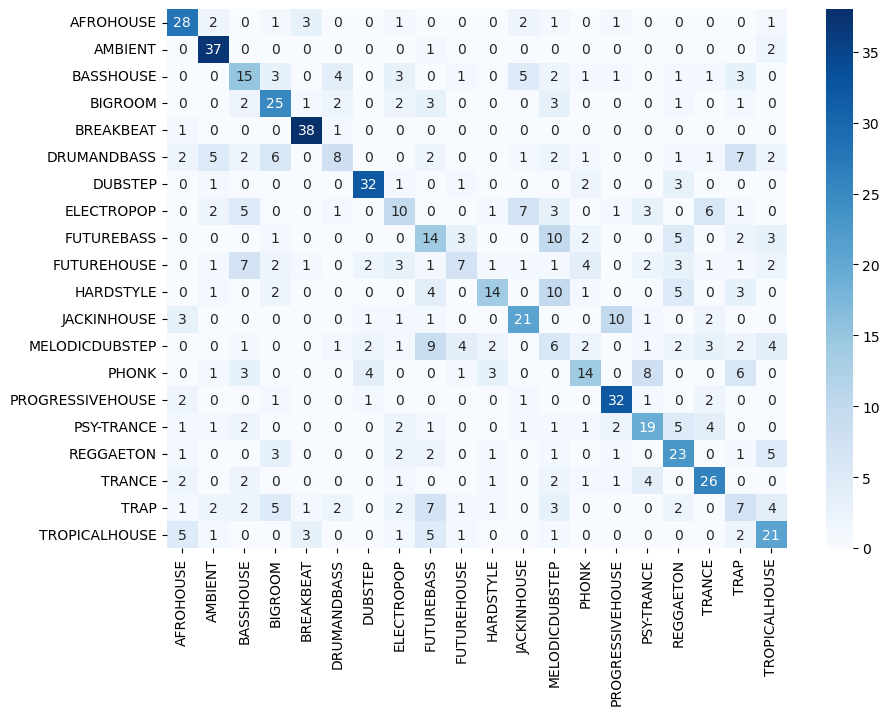

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.show()